# Homicide Police Response Prediction

## Imports

In [125]:
import utils

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


## Import data

In [2]:
df = pd.read_excel("./data/homicide-data.xlsx")

## Shuffle and split the data

In [3]:
train_and_valid_set, test_set = train_test_split(df, test_size = 0.2, random_state = 0)
train_set, validation_sat = train_test_split(train_and_valid_set, test_size=0.2, random_state = 0)

## Exploratory data analysis

In [4]:
train_set.sample(10)

,uid,reported_date,victim_last,victim_first,victim_race,victim_age,victim_sex,city,state,lat,lon,disposition
17206,Det-000792,20160210,WILLIAMS,JOHNATHON,Black,31,Male,Detroit,MI,42.375325,-83.178332,Closed by arrest
37226,NO-001269,20161204,SMITH,TYRE,Black,18,Male,New Orleans,LA,29.965034,-90.073101,Open/No arrest
955,Atl-001333,20130102,EDMONDSON,ELIJAH,White,23,Male,Atlanta,GA,33.761920,-84.416426,Closed by arrest
44253,Pit-000290,20130811,SMITH,DARREN,Black,34,Male,Pittsburgh,PA,40.417225,-79.999013,Open/No arrest
13675,Col-000224,20140325,ARMSTRONG,DRESAN,Black,18,Male,Columbus,OH,39.955433,-82.951059,Open/No arrest
33481,Mia-000540,20140622,GUZMAN,MARTHA,White,11,Female,Miami,FL,25.777260,-80.208623,Closed by arrest
13356,Cin-001055,20160723,ODNEAL,BOBBIE III,Black,23,Male,Cincinnati,OH,39.149817,-84.551325,Open/No arrest
52024,Was-001222,20071109,HENSON,DEANTHONY,Black,20,Male,Washington,DC,38.875051,-77.010441,Closed by arrest
50257,Tul-000180,20070124,GILBERT,DAVID,White,26,Male,Tulsa,OK,36.165640,-95.971930,Closed by arrest
22281,Hou-003818,20141208,ROMERO-ALVAREZ,ANGELINA,Hispanic,50,Female,Houston,TX,29.678214,-95.415765,Closed by arrest


In [5]:
utils.transform_data(train_set)

In [6]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33394 entries, 6163 to 14544
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   reported_date  33394 non-null  datetime64[ns]
 1   victim_race    33394 non-null  category      
 2   victim_age     33394 non-null  int32         
 3   victim_sex     33394 non-null  category      
 4   lat            33359 non-null  float64       
 5   lon            33359 non-null  float64       
 6   disposition    33394 non-null  category      
 7   month          33394 non-null  category      
 8   weekday        33394 non-null  category      
 9   delta_days     33394 non-null  float64       
dtypes: category(5), datetime64[ns](1), float64(3), int32(1)
memory usage: 1.6 MB


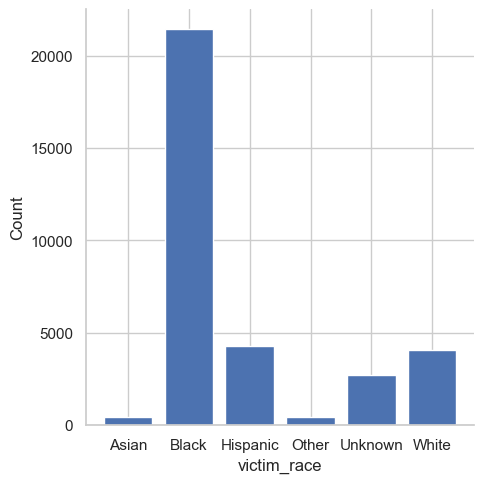

In [7]:
sns.displot(data=train_set, x="victim_race", shrink=0.8, alpha=1)

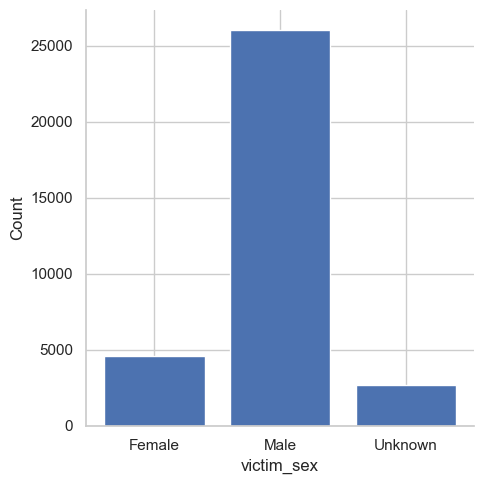

In [56]:
sns.displot(data=train_set, x="victim_sex", shrink=0.8, alpha=1)

<Axes: >

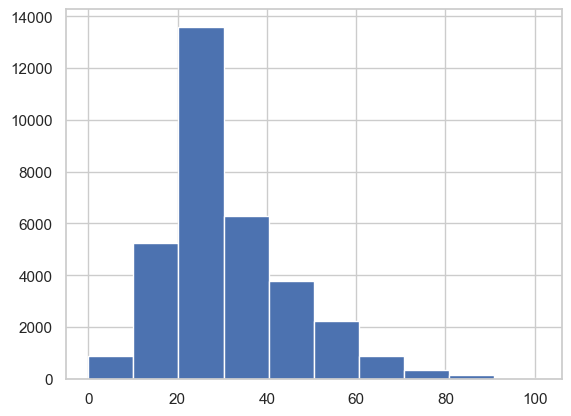

In [61]:
train_set["victim_age"].hist()

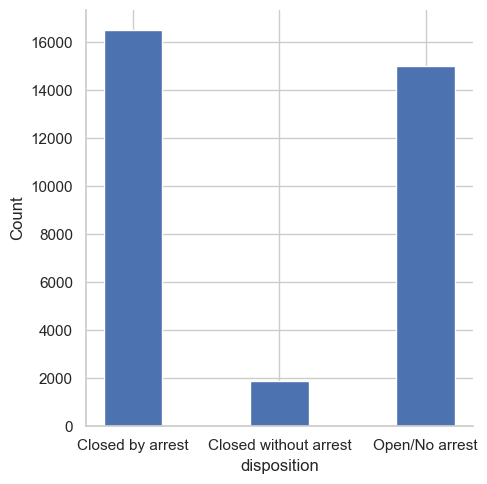

In [8]:
sns.displot(data=train_set, x="disposition", shrink=0.4, alpha=1)

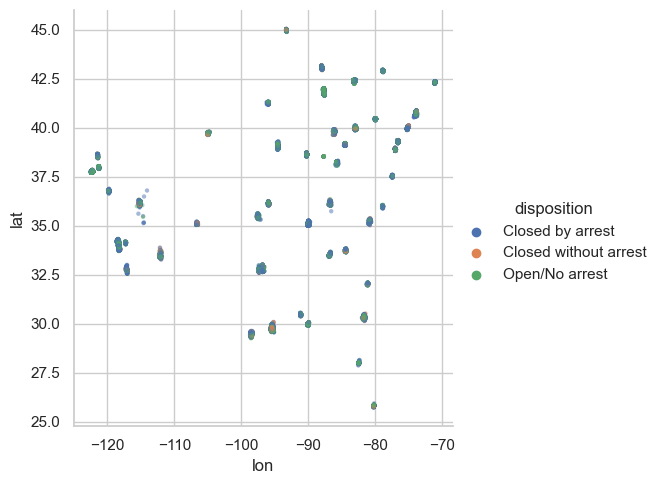

In [54]:
sns.relplot(train_set, x="lon", y="lat", alpha=0.5, hue="disposition", linewidth=0, s=10)

In [10]:
train_set.describe()

,reported_date,victim_age,lat,lon,delta_days
count,33394,33394.000000,33359.000000,33359.000000,33394.000000
mean,2012-11-06 00:37:20.594118400,29.861233,37.028663,-91.482557,1880.974067
min,2007-01-01 00:00:00,-1.000000,25.725660,-122.503286,0.000000
25%,2010-03-17 00:00:00,21.000000,33.762503,-95.998378,838.000000
50%,2012-12-23 12:00:00,27.000000,38.538284,-87.709572,1833.500000
75%,2015-09-15 00:00:00,39.000000,40.029895,-81.748009,2846.000000
max,2017-12-31 00:00:00,101.000000,45.051190,-71.011519,4017.000000
std,NaN,15.962282,4.354980,13.766350,1163.620589


In [11]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33394 entries, 6163 to 14544
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   reported_date  33394 non-null  datetime64[ns]
 1   victim_race    33394 non-null  category      
 2   victim_age     33394 non-null  int32         
 3   victim_sex     33394 non-null  category      
 4   lat            33359 non-null  float64       
 5   lon            33359 non-null  float64       
 6   disposition    33394 non-null  category      
 7   month          33394 non-null  category      
 8   weekday        33394 non-null  category      
 9   delta_days     33394 non-null  float64       
dtypes: category(5), datetime64[ns](1), float64(3), int32(1)
memory usage: 2.6 MB


## Impute and transform data

In [12]:
age_imputer = SimpleImputer(missing_values = -1, strategy = "median")

In [13]:
train_set["victim_age"] = age_imputer.fit_transform(train_set["victim_age"].values.reshape(-1, 1))[:, 0].astype(int)

In [14]:
coordinate_imputer = SimpleImputer(missing_values = np.nan, strategy = "median")

In [15]:
train_set["lat"] = coordinate_imputer.fit_transform(train_set["lat"].values.reshape(-1, 1))[:, 0]
train_set["lon"] = coordinate_imputer.fit_transform(train_set["lon"].values.reshape(-1, 1))[:, 0]

In [16]:
train_set.describe()

,reported_date,victim_age,lat,lon,delta_days
count,33394,33394.000000,33394.000000,33394.000000,33394.000000
mean,2012-11-06 00:37:20.594118400,31.554651,37.030245,-91.478603,1880.974067
min,2007-01-01 00:00:00,0.000000,25.725660,-122.503286,0.000000
25%,2010-03-17 00:00:00,22.000000,33.763686,-95.996832,838.000000
50%,2012-12-23 12:00:00,28.000000,38.538284,-87.709572,1833.500000
75%,2015-09-15 00:00:00,39.000000,40.029322,-81.752102,2846.000000
max,2017-12-31 00:00:00,101.000000,45.051190,-71.011519,4017.000000
std,NaN,14.018282,4.352971,13.759676,1163.620589


<Axes: xlabel='month'>

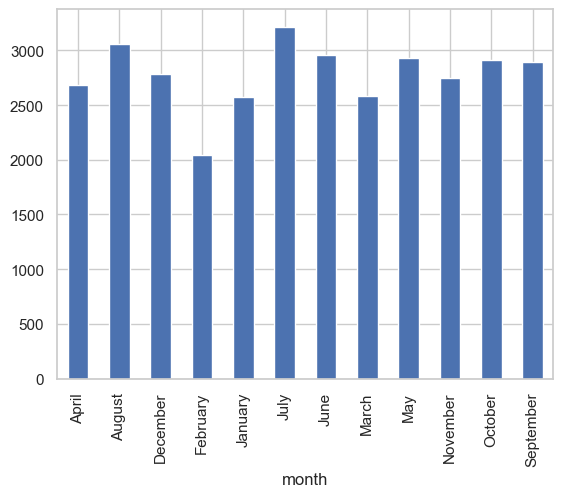

In [17]:
train_set.groupby("month").size().plot(kind="bar")

<Axes: xlabel='weekday'>

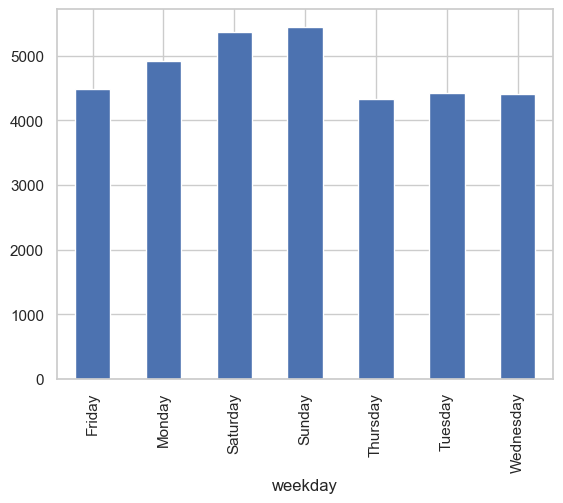

In [18]:
train_set.groupby("weekday").size().plot(kind="bar")

Closed by arrest              Axes(0.1,0.559091;0.363636x0.340909)
Closed without arrest    Axes(0.536364,0.559091;0.363636x0.340909)
Open/No arrest                    Axes(0.1,0.15;0.363636x0.340909)
dtype: object

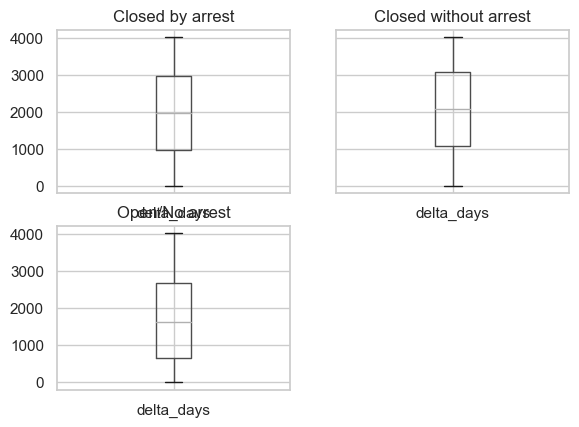

In [19]:
train_set[["delta_days", "disposition"]].groupby("disposition").boxplot()

In [20]:
train_set_onehot = train_set[["victim_race", "victim_sex", "month", "weekday"]]

In [21]:
onehot_encoder = OneHotEncoder(sparse_output = False)

In [22]:
train_set_onehot_array = onehot_encoder.fit_transform(train_set_onehot)

In [23]:
train_set_onehot = pd.DataFrame(train_set_onehot_array,
                               columns = onehot_encoder.get_feature_names_out(),
                               index = train_set_onehot.index).astype(int)

In [24]:
train_set_onehot

,victim_race_Asian,victim_race_Black,victim_race_Hispanic,victim_race_Other,victim_race_Unknown,victim_race_White,victim_sex_Female,victim_sex_Male,victim_sex_Unknown,month_April,...,month_November,month_October,month_September,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
6163,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
49505,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
32106,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
30512,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
10814,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4367,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
8607,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
18397,0,1,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
34727,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [25]:
train_set_num = train_set[["victim_age", "lat", "lon", "delta_days"]]

In [126]:
std_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

In [127]:
# train_set_num_scaled = std_scaler.fit_transform(train_set_num)
train_set_num_scaled = min_max_scaler.fit_transform(train_set_num)

In [128]:
train_set_num_scaled

,victim_age,lat,lon,delta_days
6163,0.247525,0.888921,0.848428,0.736868
49505,0.396040,0.665881,0.626124,0.039333
32106,0.534653,0.484963,0.629779,0.460045
30512,0.366337,0.427990,0.078403,0.128205
10814,0.217822,0.829854,0.677276,0.280558
...,...,...,...,...
4367,0.217822,0.243705,0.608383,0.331591
8607,0.316832,0.840716,0.675537,0.732885
18397,0.277228,0.864192,0.761830,0.243216
34727,0.445545,0.900124,0.670291,0.671646


In [130]:
train_set_num = pd.DataFrame(train_set_num_scaled,
                            columns = min_max_scaler.get_feature_names_out(),
                            index = train_set_num.index)

In [131]:
train_set_num

,victim_age,lat,lon,delta_days
6163,0.247525,0.888921,0.848428,0.736868
49505,0.396040,0.665881,0.626124,0.039333
32106,0.534653,0.484963,0.629779,0.460045
30512,0.366337,0.427990,0.078403,0.128205
10814,0.217822,0.829854,0.677276,0.280558
...,...,...,...,...
4367,0.217822,0.243705,0.608383,0.331591
8607,0.316832,0.840716,0.675537,0.732885
18397,0.277228,0.864192,0.761830,0.243216
34727,0.445545,0.900124,0.670291,0.671646


In [132]:
train_set_transformed = pd.concat((train_set_onehot, train_set_num), axis = 1)

In [133]:
train_set_transformed

,victim_race_Asian,victim_race_Black,victim_race_Hispanic,victim_race_Other,victim_race_Unknown,victim_race_White,victim_sex_Female,victim_sex_Male,victim_sex_Unknown,month_April,...,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,victim_age,lat,lon,delta_days
6163,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0.247525,0.888921,0.848428,0.736868
49505,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0.396040,0.665881,0.626124,0.039333
32106,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0.534653,0.484963,0.629779,0.460045
30512,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0.366337,0.427990,0.078403,0.128205
10814,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0.217822,0.829854,0.677276,0.280558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4367,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0.217822,0.243705,0.608383,0.331591
8607,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,1,0.316832,0.840716,0.675537,0.732885
18397,0,1,0,0,0,0,0,1,0,1,...,0,0,0,0,0,1,0.277228,0.864192,0.761830,0.243216
34727,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0.445545,0.900124,0.670291,0.671646


## Make pipelines

In [134]:
age_pipeline = Pipeline([
    ("impute", age_imputer),
    ("standardize", std_scaler),
])

coordinate_pipeline = Pipeline([
    ("impute", coordinate_imputer),
    ("standardize", std_scaler)
])

delta_days_pipeline = Pipeline([
    ("standardize", std_scaler)
])

onehot_pipeline  = Pipeline([
    ("onehot", onehot_encoder)
])

preprocessing = ColumnTransformer([
    ("age", age_pipeline, ["victim_age"]),
    ("coordinates", coordinate_pipeline, ["lat", "lon"]),
    ("delta_days", delta_days_pipeline, ["delta_days"]),
    ("onehot", onehot_pipeline, ["victim_race", "victim_sex", "month", "weekday"])
])

In [135]:
train_set_prepared = preprocessing.fit_transform(train_set.drop("disposition", axis=1))

In [136]:
train_set_prepared.shape

(33394, 32)

In [137]:
preprocessing.get_feature_names_out()

array(['age__victim_age', 'coordinates__lat', 'coordinates__lon',
       'delta_days__delta_days', 'onehot__victim_race_Asian',
       'onehot__victim_race_Black', 'onehot__victim_race_Hispanic',
       'onehot__victim_race_Other', 'onehot__victim_race_Unknown',
       'onehot__victim_race_White', 'onehot__victim_sex_Female',
       'onehot__victim_sex_Male', 'onehot__victim_sex_Unknown',
       'onehot__month_April', 'onehot__month_August',
       'onehot__month_December', 'onehot__month_February',
       'onehot__month_January', 'onehot__month_July',
       'onehot__month_June', 'onehot__month_March', 'onehot__month_May',
       'onehot__month_November', 'onehot__month_October',
       'onehot__month_September', 'onehot__weekday_Friday',
       'onehot__weekday_Monday', 'onehot__weekday_Saturday',
       'onehot__weekday_Sunday', 'onehot__weekday_Thursday',
       'onehot__weekday_Tuesday', 'onehot__weekday_Wednesday'],
      dtype=object)

## Select and train a model

In [138]:
from sklearn import set_config
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [139]:
set_config(transform_output="pandas")

In [140]:
tree_classifier = Pipeline([
    ("preprocess", preprocessing),
    ("train", DecisionTreeClassifier())
])

In [141]:
bagging_classifier = Pipeline([
    ("preprocess", preprocessing),
    ("train", BaggingClassifier())
])

In [142]:
gradient_boosting_classifier = Pipeline([
    ("preprocess", preprocessing),
    ("train", GradientBoostingClassifier(learning_rate=0.2))
])

In [143]:
categorical_naive_bayes_classifier = Pipeline([
    ("preprocess", preprocessing),
    ("train", GradientBoostingClassifier())
])

In [144]:
tree_classifier.fit(X=train_set, y=train_set.loc[:, "disposition"])

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('age',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(missing_values=-1,
                                                                                 strategy='median')),
                                                                  ('standardize',
                                                                   StandardScaler())]),
                                                  ['victim_age']),
                                                 ('coordinates',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize',
                                                                   StandardScaler())]),
                                                  ['lat', 'lon']),
                                                 ('delta_days',
                                                  Pipeline(steps=[('standardize',
                                                                   StandardScaler())]),
                                                  ['delta_days']),
                                                 ('onehot',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(sparse_output=False))]),
                                                  ['victim_race', 'victim_sex',
                                                   'month', 'weekday'])])),
                ('train', DecisionTreeClassifier())])

In [145]:
bagging_classifier.fit(train_set, train_set["disposition"])

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('age',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(missing_values=-1,
                                                                                 strategy='median')),
                                                                  ('standardize',
                                                                   StandardScaler())]),
                                                  ['victim_age']),
                                                 ('coordinates',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize',
                                                                   StandardScaler())]),
                                                  ['lat', 'lon']),
                                                 ('delta_days',
                                                  Pipeline(steps=[('standardize',
                                                                   StandardScaler())]),
                                                  ['delta_days']),
                                                 ('onehot',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(sparse_output=False))]),
                                                  ['victim_race', 'victim_sex',
                                                   'month', 'weekday'])])),
                ('train', BaggingClassifier())])

In [146]:
gradient_boosting_classifier.fit(train_set, train_set["disposition"])

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('age',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(missing_values=-1,
                                                                                 strategy='median')),
                                                                  ('standardize',
                                                                   StandardScaler())]),
                                                  ['victim_age']),
                                                 ('coordinates',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize',
                                                                   StandardScaler())]),
                                                  ['lat', 'lon']),
                                                 ('delta_days',
                                                  Pipeline(steps=[('standardize',
                                                                   StandardScaler())]),
                                                  ['delta_days']),
                                                 ('onehot',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(sparse_output=False))]),
                                                  ['victim_race', 'victim_sex',
                                                   'month', 'weekday'])])),
                ('train', GradientBoostingClassifier(learning_rate=0.2))])

In [147]:
categorical_naive_bayes_classifier.fit(train_set, train_set["disposition"])

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('age',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(missing_values=-1,
                                                                                 strategy='median')),
                                                                  ('standardize',
                                                                   StandardScaler())]),
                                                  ['victim_age']),
                                                 ('coordinates',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize',
                                                                   StandardScaler())]),
                                                  ['lat', 'lon']),
                                                 ('delta_days',
                                                  Pipeline(steps=[('standardize',
                                                                   StandardScaler())]),
                                                  ['delta_days']),
                                                 ('onehot',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(sparse_output=False))]),
                                                  ['victim_race', 'victim_sex',
                                                   'month', 'weekday'])])),
                ('train', GradientBoostingClassifier())])

In [148]:
features = pd.DataFrame(categorical_naive_bayes_classifier.steps[-1][1].feature_importances_, index=gradient_boosting_classifier.steps[-1][1].feature_names_in_, columns=["Importance"])
features.sort_values("Importance", ascending=False)

,Importance
coordinates__lat,0.350811
coordinates__lon,0.147838
delta_days__delta_days,0.140709
age__victim_age,0.124006
onehot__victim_sex_Female,0.083755
onehot__victim_race_White,0.076304
onehot__victim_sex_Male,0.031397
onehot__victim_race_Black,0.012260
onehot__month_December,0.005200
onehot__victim_race_Asian,0.003097


In [149]:
utils.transform_data(validation_sat)

KeyError: "['uid', 'victim_last', 'victim_first', 'state', 'city'] not found in axis"

In [150]:
labels = validation_sat["disposition"]

In [151]:
dtc_scores = cross_val_score(tree_classifier, train_set, train_set["disposition"], scoring="accuracy", cv=10)

In [152]:
pd.Series(dtc_scores).describe()

count    10.000000
mean      0.524436
std       0.005912
min       0.514671
25%       0.520323
50%       0.524630
75%       0.527139
max       0.534891
dtype: float64

In [153]:
bc_scores = cross_val_score(bagging_classifier, train_set, train_set["disposition"], scoring="accuracy", cv=10)

In [154]:
pd.Series(bc_scores).describe()

count    10.000000
mean      0.572498
std       0.007215
min       0.561976
25%       0.568284
50%       0.573653
75%       0.575621
max       0.586104
dtype: float64

In [155]:
gbc_scores = cross_val_score(gradient_boosting_classifier, train_set, train_set["disposition"], scoring="accuracy", cv=10)

In [156]:
pd.Series(gbc_scores).describe()

count    10.000000
mean      0.601396
std       0.007008
min       0.590895
25%       0.597889
50%       0.600090
75%       0.605285
max       0.615753
dtype: float64

In [157]:
cnbc_scores = cross_val_score(categorical_naive_bayes_classifier, train_set, train_set["disposition"])

In [158]:
pd.Series(cnbc_scores).describe()

count    5.000000
mean     0.599898
std      0.006789
min      0.592903
25%      0.595448
50%      0.598233
75%      0.602785
max      0.610121
dtype: float64

The gradient boosting classifier seems to be the most accurate at predicting disposition.

## Comparison with random choice

In [124]:
# Sample dataset with categorical labels (replace with your dataset)
labels = train_set["disposition"]

# Calculate the frequency of each category
unique_labels, label_counts = np.unique(labels, return_counts=True)

# Total number of data points
total_data_points = len(labels)

# Calculate the probability of each category
label_probabilities = label_counts / total_data_points

# Calculate the overall probability of correctly guessing at random
probability_correct_guess = np.max(label_probabilities)

print("Category Frequencies:")
for label, count, probability in zip(unique_labels, label_counts, label_probabilities):
    print(f"Label: {label}, Count: {count}, Probability: {probability:.2f}")

print(f"Overall Probability of Correct Guess: {probability_correct_guess:.2f}")


Category Frequencies:
Label: Closed by arrest, Count: 16513, Probability: 0.49
Label: Closed without arrest, Count: 1866, Probability: 0.06
Label: Open/No arrest, Count: 15015, Probability: 0.45
Overall Probability of Correct Guess: 0.49
